# Python script to implement Principal Component Ananlysis (PCA). 

(207, 60)


Text(0.5, 1.0, 'PCA accuracy score')

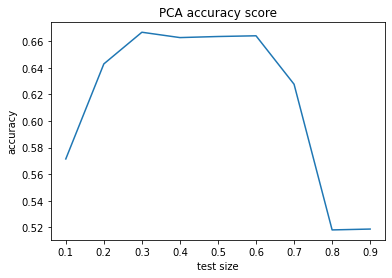

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv(r"C:\Users\adity\Documents\6 sem tiet\ML\sonar.csv") 
sonar_data=np.array(data)
samples=sonar_data[:,:-1]
print(samples.shape)
rocks_labels=np.zeros(96)
mines_labels=np.ones(111)
target=np.concatenate((rocks_labels,mines_labels),axis=0)
df=pd.DataFrame(samples)
df['target']=target
# print(df.head())
from sklearn.decomposition import PCA

x=df.iloc[:,:-1]
pca = PCA(n_components=3)
pca_x=pca.fit_transform(x)


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
accu=[]
axis=np.arange(0.1, 1.0, 0.1)

for  i in np.arange(0.1, 1.0, 0.1):
    X_train,X_test,y_train,y_test=train_test_split(pca_x,df['target'],test_size=i,random_state=0)
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    accu.append(accuracy)
plt.plot(axis,accu)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("PCA accuracy score")

# Python script to implement Linear Discriminant Analysis (LDA). 

(207, 60)


Text(0.5, 1.0, 'PCA accuracy score')

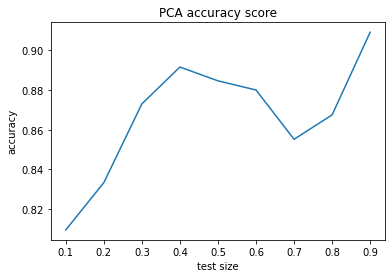

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv(r"C:\Users\adity\Documents\6 sem tiet\ML\sonar.csv") 
sonar_data=np.array(data)
samples=sonar_data[:,:-1]
print(samples.shape)
rocks_labels=np.zeros(96)
mines_labels=np.ones(111)
target=np.concatenate((rocks_labels,mines_labels),axis=0)
df=pd.DataFrame(samples)
df['target']=target
y=df['target']
# print(df.head())
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x=df.iloc[:,:-1]
lda = LinearDiscriminantAnalysis(n_components=1)
lda_x = lda.fit(x, y).transform(x)


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
accu=[]
axis=np.arange(0.1, 1.0, 0.1)

for  i in np.arange(0.1, 1.0, 0.1):
    X_train,X_test,y_train,y_test=train_test_split(lda_x,df['target'],test_size=i,random_state=0)
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    accu.append(accuracy)
plt.plot(axis,accu)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.title("LDA accuracy score")

# Comparing the results of PCA and LDA and clearly distinguish the two processes for functionality, implemetation and achievable results

explained variance ratio (first two components): [0.92461872 0.05306648]


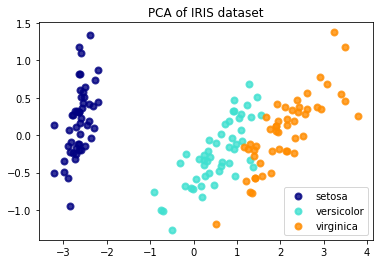

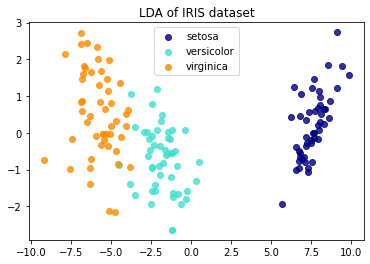

In [17]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels